# Shapes statistics

In [2]:
from PIL import Image
import numpy as np
import cv2
import numpy as np
image = np.array(Image.open(r"..\..\data_test\test_shape_characteristics.jpg".replace("\\","/")))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

C:\Anaconda\envs\pytorch\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Anaconda\envs\pytorch\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Anaconda\envs\pytorch\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


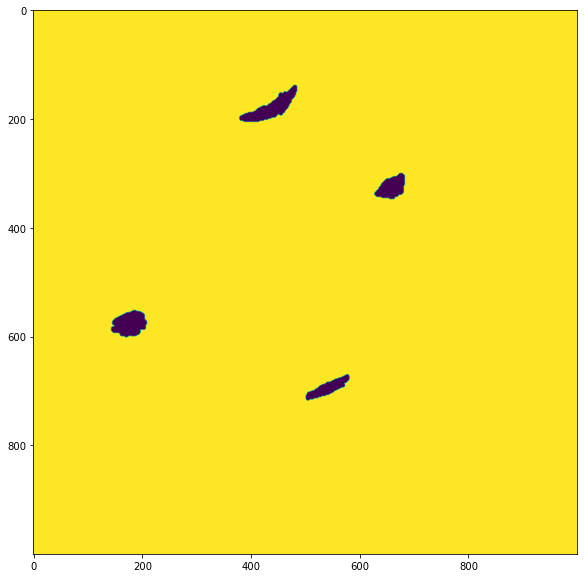

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(image)

The goal is to detect the max and min length of the four shapes

In [9]:
ret, thresh = cv2.threshold(image, 127, 255, 0)
contours,_ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

5


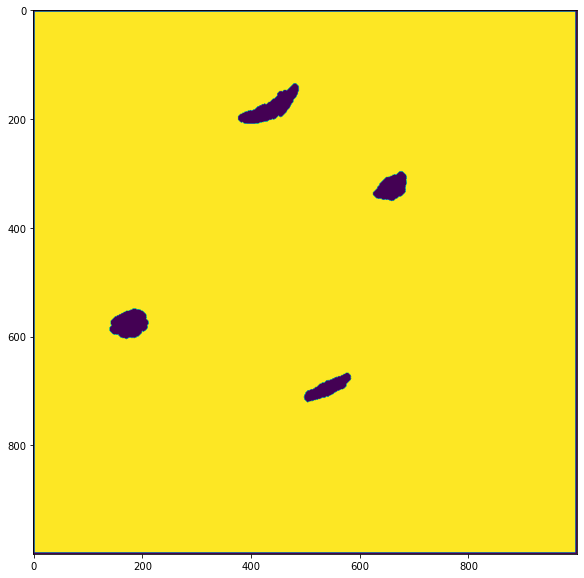

In [10]:
print(len(contours))
thresh_drawn = np.copy(thresh)
cv2.drawContours(thresh_drawn, contours, -1, (0,255,0), 3)
plt.figure(figsize=(10,10))
plt.imshow(thresh_drawn)

In [11]:
print(len([e for e in _[0] if e[-1] == 0]))

4


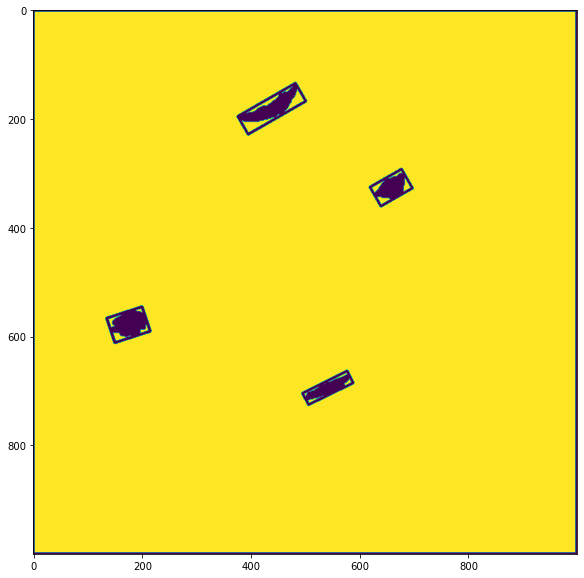

In [12]:
boxes_image = np.copy(image)
plt.figure(figsize=(10,10))
for points in contours:
    rect = cv2.minAreaRect(points)
    box = np.int0(cv2.boxPoints(rect))
    cv2.drawContours(boxes_image, [box], 0, (0,255,0), 3)
plt.imshow(boxes_image)

## Test sur quelques images

027481_0319CB_0EB7
Classe 1
Classe 2


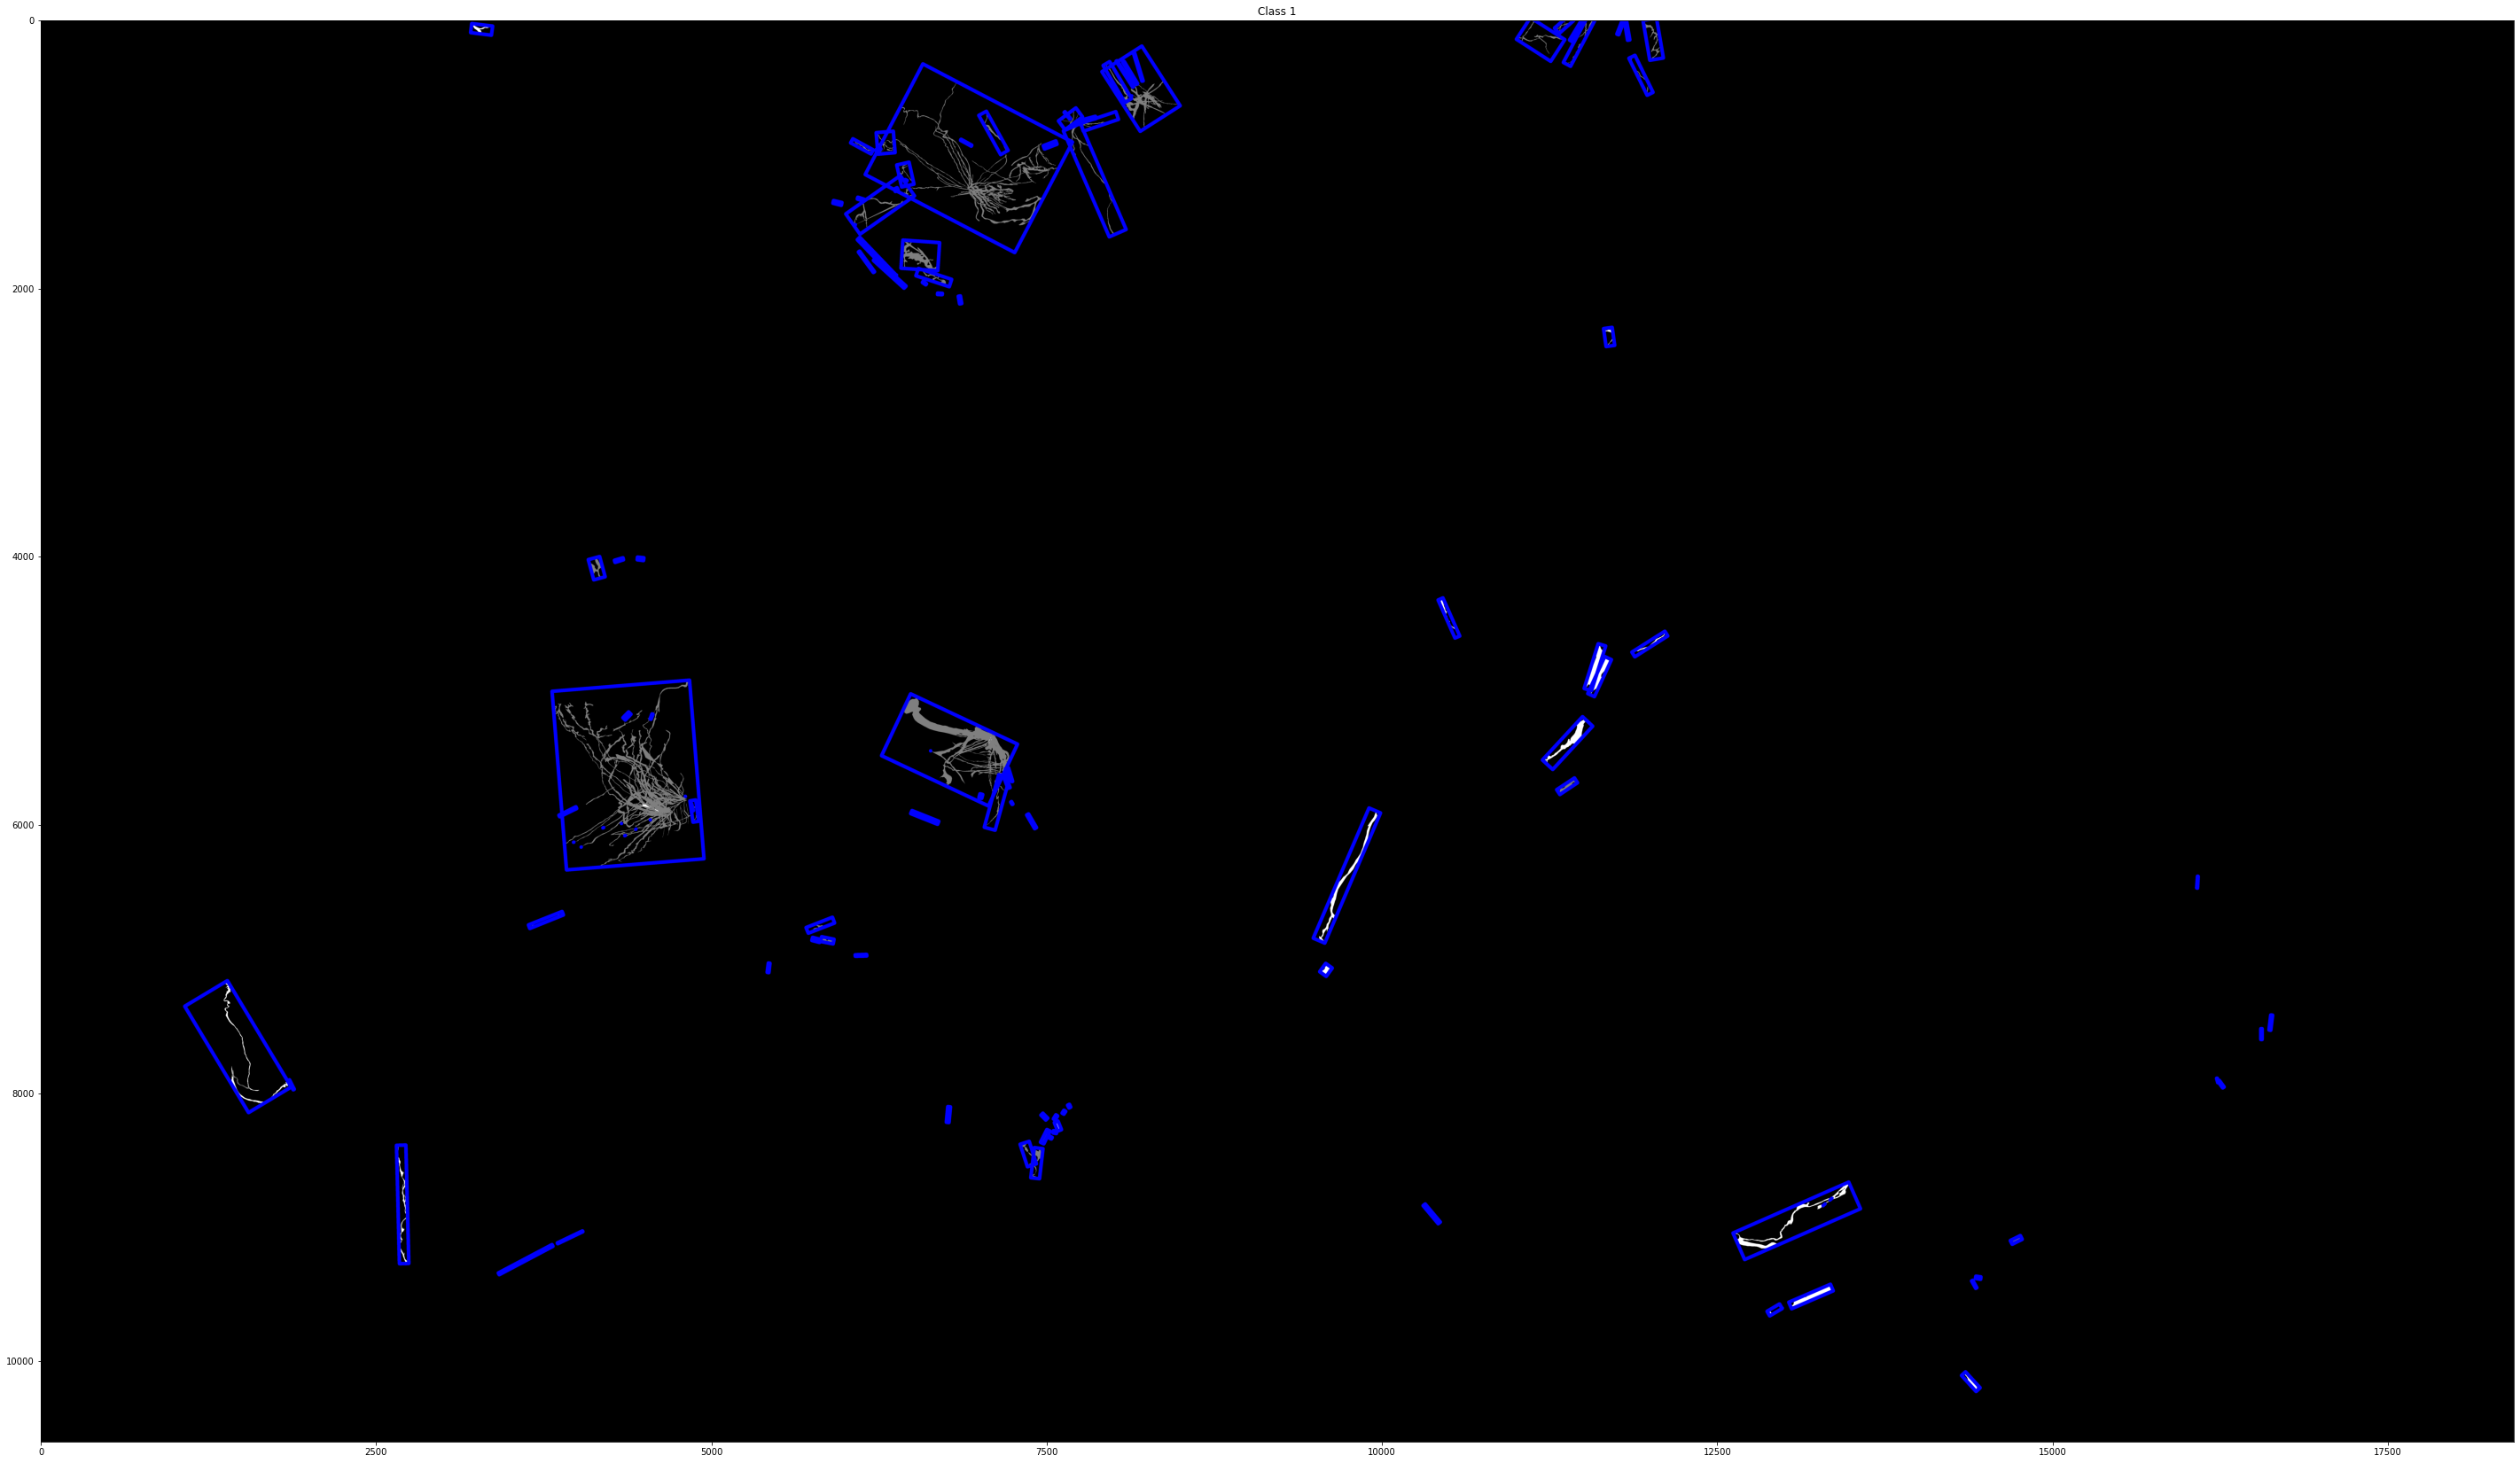

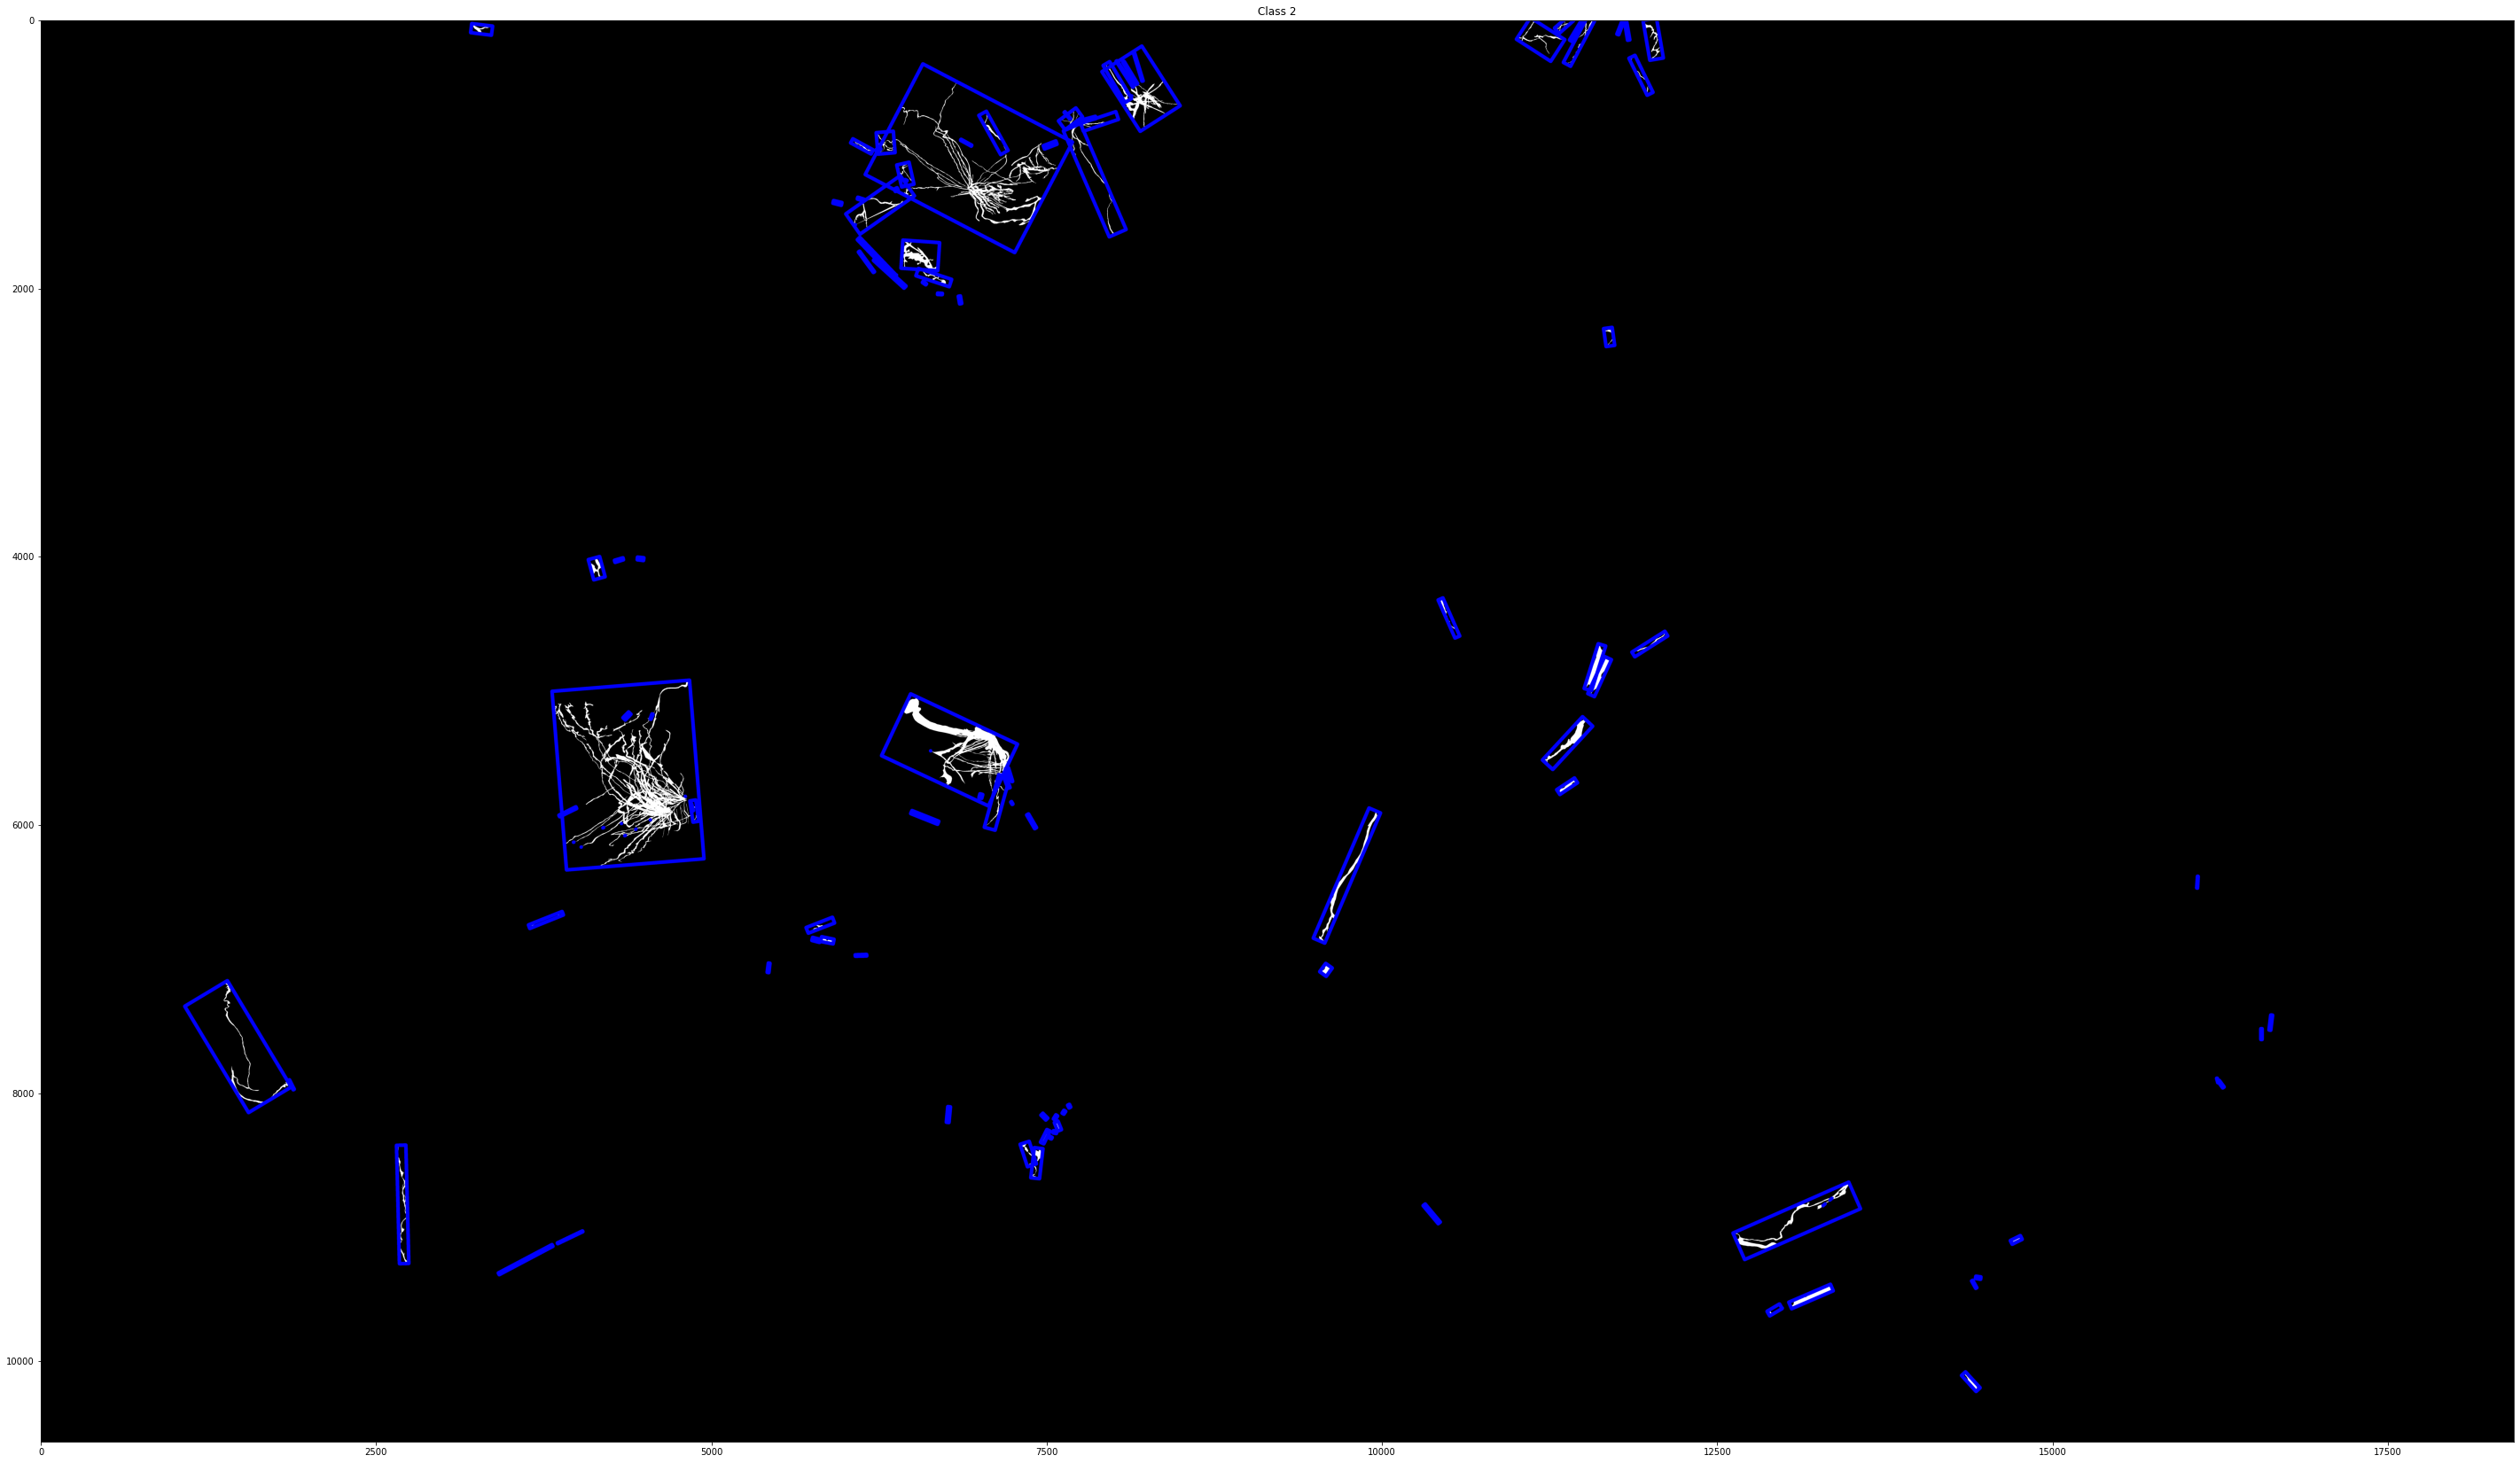

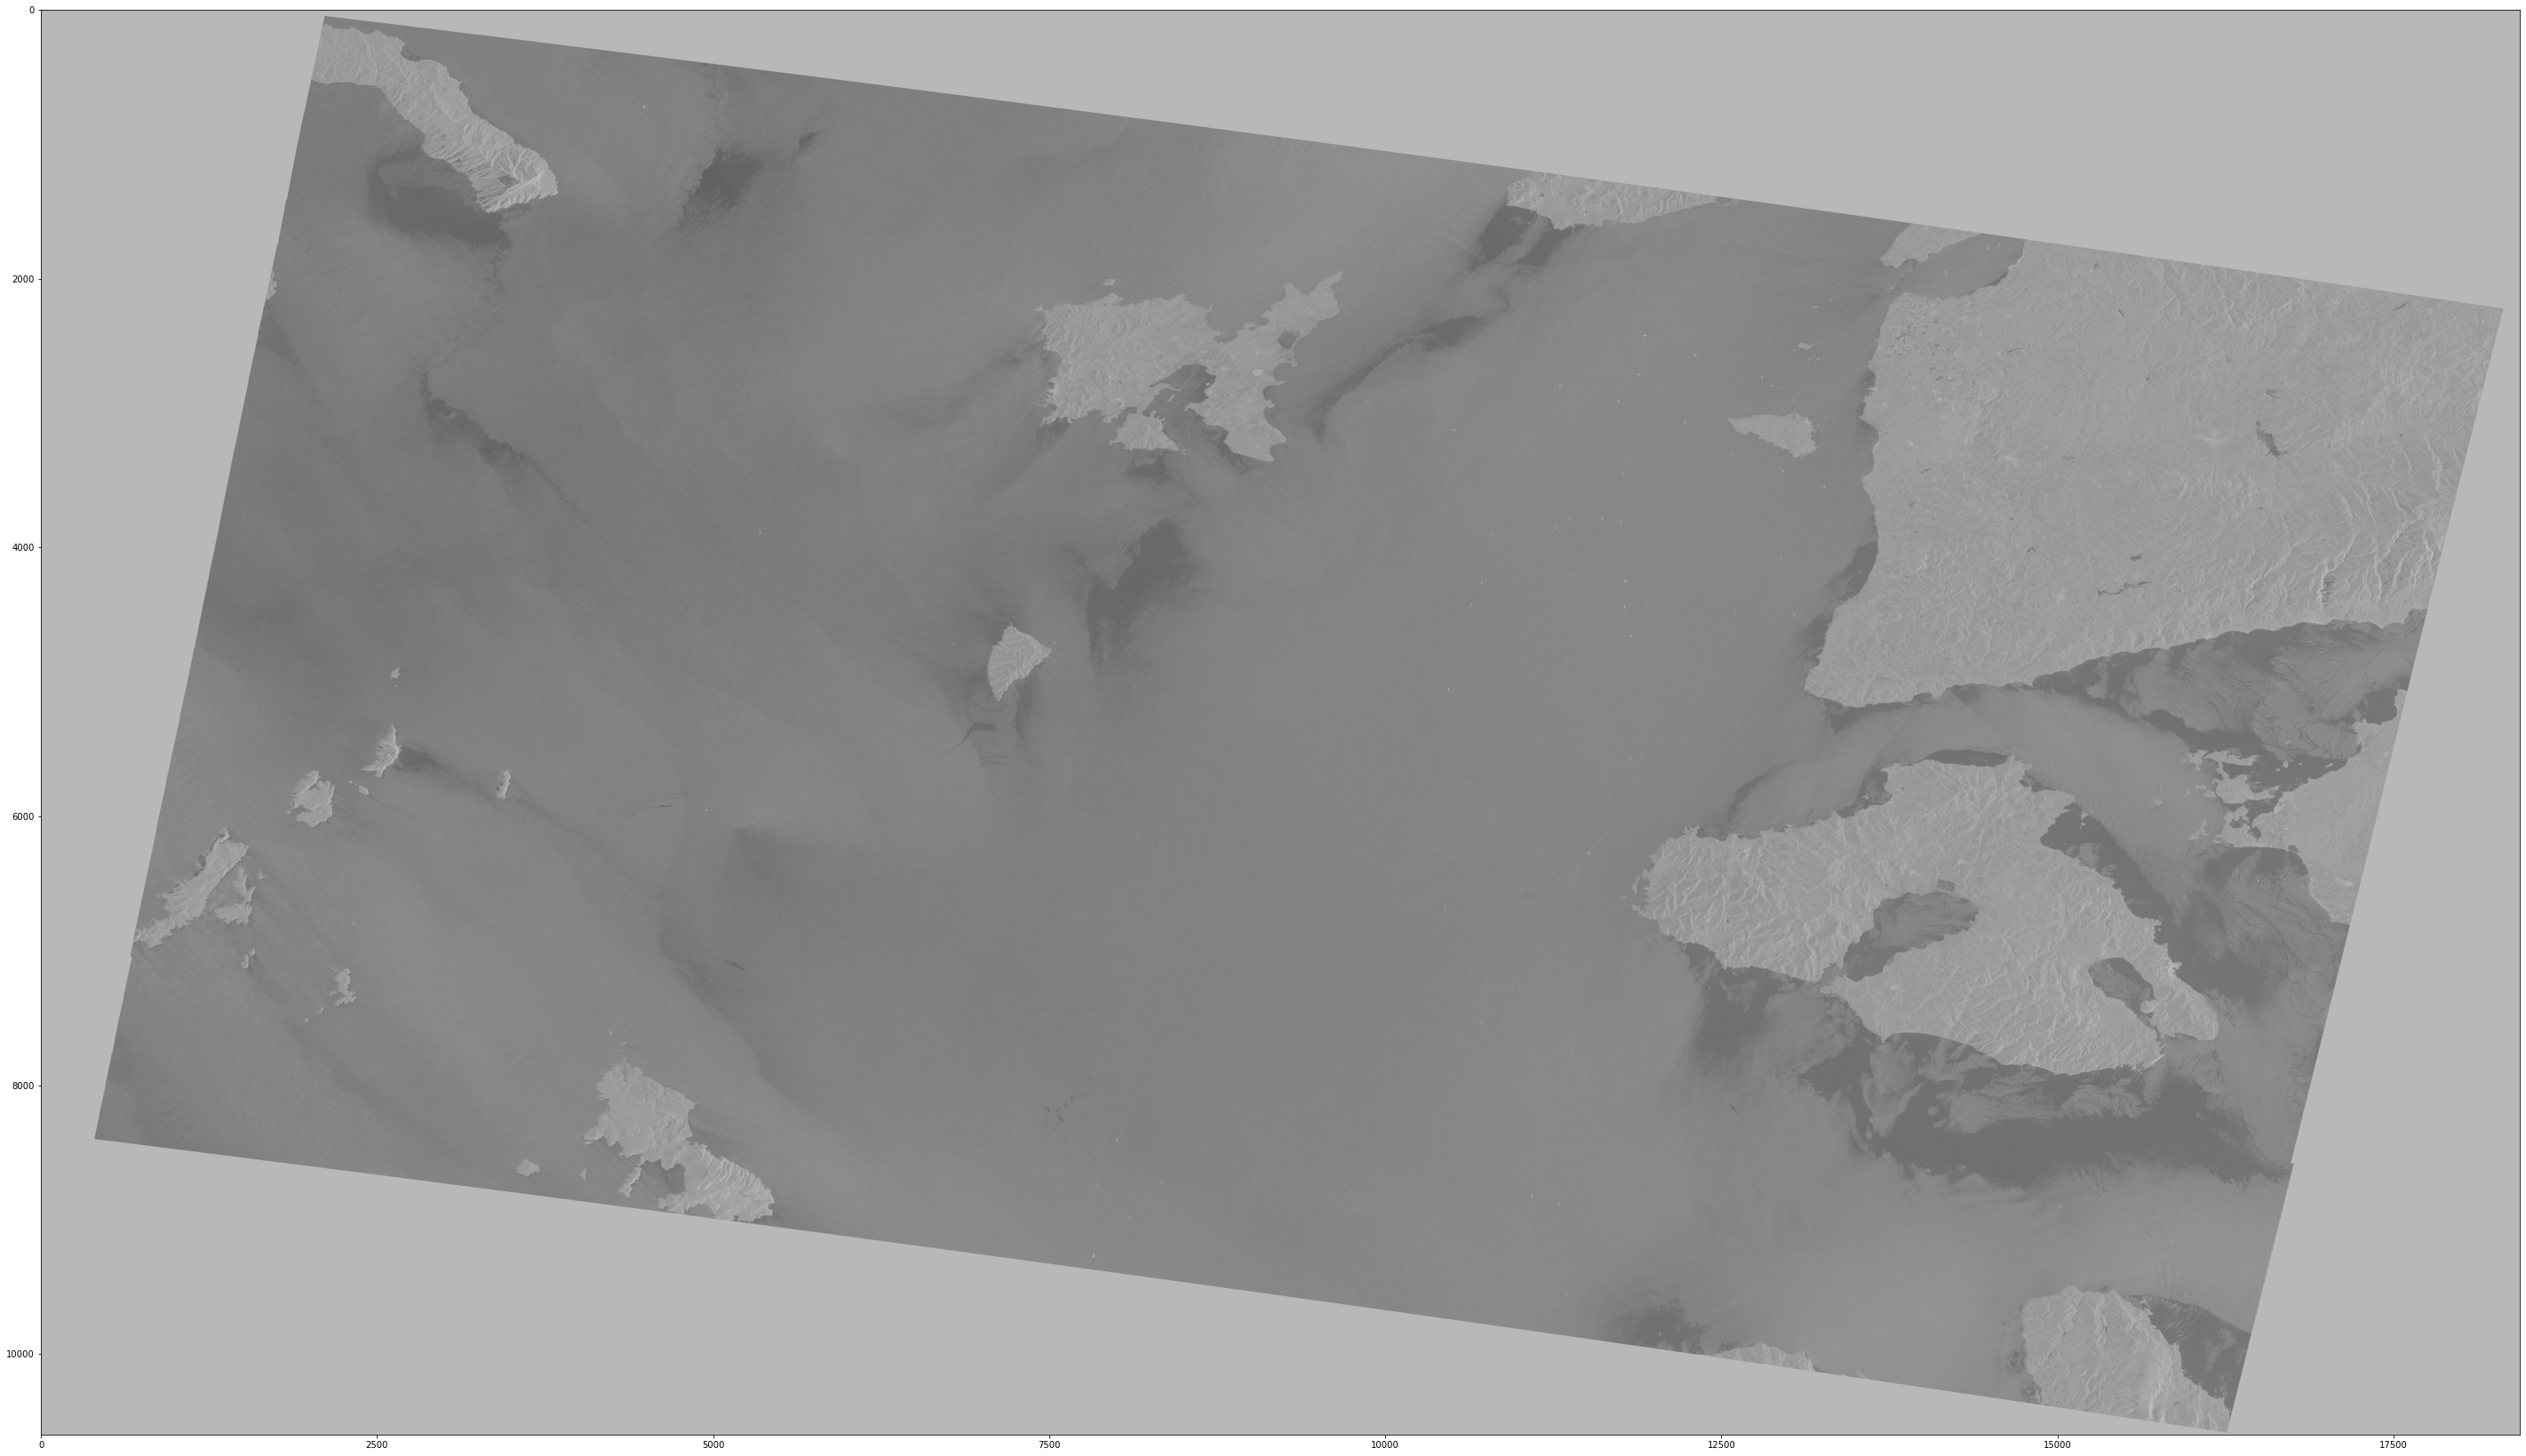

In [61]:
from h5py import File
import os
normalize = lambda x:(x-np.min(x))/(np.max(x)-np.min(x))
with File(r"C:\Users\robin\Documents\projets\detection_nappe_hydrocarbures_inria_cefrem\data_in\annotations_labels_preprocessed.hdf5","r") as cache:
    k = "027481_0319CB_0EB7"
    img = cache[k]
    print(k)
    classes_to_analyse = [1,2]
    for classe in classes_to_analyse:
        print(f"Classe {classe}")
        plt.figure(figsize=(50,50))
        plt.title(f"Class {classe}")
        img = np.uint8(normalize(np.clip(img,classe-0.5,classe+0.5))*255)

        contours,hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        image_rgb = np.stack((img,)*3,axis=-1)
        for points,hier in zip(contours,hierarchy[0]):
            if hier[-1] != -1:
                continue
            rect = cv2.minAreaRect(points)
            box = np.int0(cv2.boxPoints(rect))
            cv2.drawContours(image=image_rgb, contours=[box], contourIdx=0, color=(0,0,255), thickness=25)
        plt.imshow(image_rgb)
        plt.savefig(f"./test_{classe}.png")
with File(r"C:\Users\robin\Documents\projets\detection_nappe_hydrocarbures_inria_cefrem\data_in\images_preprocessed.hdf5","r") as cache:
    plt.figure(figsize=(50,50))
    img = cache[k]
    plt.imshow(img,cmap="gray")
    # for name,value in cache.items():

In [ ]:
from h5py import File
import numpy as np
import cv2
normalize = lambda x:(x-np.min(x))/(np.max(x)-np.min(x))
with File(r"C:\Users\robin\Documents\projets\detection_nappe_hydrocarbures_IMT_cefrem\data_in\annotations_labels_preprocessed.hdf5","r") as cache:
    classes_to_analyse = [1,2]
    dico_boxes = {"class1":{},"class2":{}}
    n = len(cache.keys())
    for i,[name,img] in enumerate(cache.items()):
        print(f"{i/n*100:.2f}%")
        for classe in classes_to_analyse:
            img = np.copy(np.array(img,dtype=np.float32))

            img = np.clip(img,classe-0.5,classe+0.5)
            img = (normalize(img)*255).astype(np.uint8)

            contours,hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            image_rgb = np.stack((img,)*3,axis=-1)
            if len(contours) == 0:
                continue
            dico_boxes[f"class{classe}"][name] = []
            for points,hier in zip(contours,hierarchy[0]):
                if hier[-1] != -1:
                    continue
                rect = cv2.minAreaRect(points)
                box = np.int0(cv2.boxPoints(rect))
                length1 = int(((box[0][0]-box[1][0])**2+(box[0][1]-box[1][1])**2)**0.5)
                length2 = int(((box[1][0]-box[2][0])**2+(box[1][1]-box[2][1])**2)**0.5)
                biggest_length = max(length1,length2)
                smallest_length = min(length1,length2)
                dico_boxes[f"class{classe}"][name].append([biggest_length,smallest_length])

0.00%
0.20%
0.41%
0.61%
0.82%
1.02%
1.23%
1.43%
1.64%
1.84%
2.05%
2.25%
2.46%
2.66%
2.87%
3.07%
3.28%
3.48%
3.69%
3.89%
4.10%
4.30%
4.51%
4.71%
4.92%
5.12%
5.33%
5.53%
5.74%
5.94%
6.15%
6.35%
6.56%
6.76%
6.97%
7.17%
7.38%
7.58%
7.79%
7.99%
8.20%
8.40%
8.61%
8.81%
9.02%
9.22%
9.43%
9.63%
9.84%
10.04%
10.25%
10.45%
10.66%
10.86%
11.07%
11.27%
11.48%
11.68%
11.89%
12.09%
12.30%
12.50%
12.70%
12.91%
13.11%
13.32%
13.52%
13.73%
13.93%
14.14%
14.34%
14.55%
14.75%
14.96%
15.16%
15.37%
15.57%
15.78%
15.98%
16.19%
16.39%
16.60%
16.80%
17.01%
17.21%
17.42%
17.62%
17.83%
18.03%
18.24%
18.44%
18.65%
18.85%
19.06%
19.26%
19.47%
19.67%
19.88%
20.08%
20.29%
20.49%
20.70%
20.90%
21.11%
21.31%
21.52%
21.72%
21.93%
22.13%
22.34%
22.54%
22.75%
22.95%
23.16%
23.36%
23.57%
23.77%
23.98%
24.18%
24.39%
24.59%
24.80%
25.00%
25.20%
25.41%
25.61%
25.82%
26.02%
26.23%
26.43%
26.64%
26.84%
27.05%
27.25%
27.46%
27.66%
27.87%
28.07%
28.28%
28.48%
28.69%
28.89%
29.10%
29.30%
29.51%
29.71%
29.92%
30.12%
30.33%
30.53%

C:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [ ]:
import os
os.getcwd()

In [75]:
import json
with open("../../data_in/shapes_statistics.json","w") as fp:
    json.dump(dico_boxes,fp,indent=4)
print("ok")

ok


In [1]:
import json
with open("../../data_in/shapes_statistics.json","r") as fp:
    dico_boxes_backup = json.load(fp)

In [19]:
dico_reso_biggest_length = {}
dico_reso_smallest_length = {}
classe = "class1"
for _,values in dico_boxes_backup[classe].items():
    for [biggestlength,smallestlength] in values:
        if biggestlength not in dico_reso_biggest_length:
            dico_reso_biggest_length[biggestlength] = 0
        if smallestlength not in dico_reso_smallest_length:
            dico_reso_smallest_length[smallestlength] = 0
        dico_reso_biggest_length[biggestlength] += 1
        dico_reso_smallest_length[smallestlength] += 1
dico_reso_biggest_length = dict(sorted(dico_reso_biggest_length.items(), key=lambda item: item[0]))
dico_reso_smallest_length = dict(sorted(dico_reso_smallest_length.items(), key=lambda item: item[0]))
print("ok")

ok


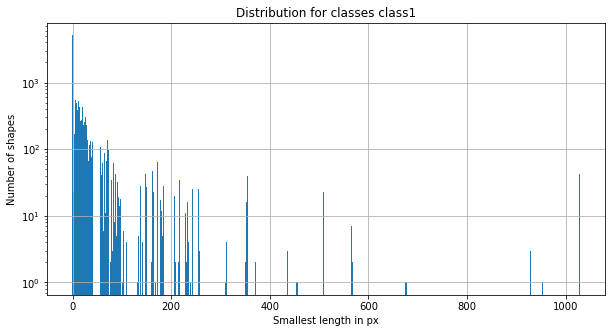

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar([k for k in dico_reso_smallest_length],
        [v for v in dico_reso_smallest_length.values()])
plt.yscale('log')
plt.grid()
plt.ylabel("Number of shapes")
plt.xlabel("Smallest length in px")
plt.title(f"Distribution for classes {classe}")
plt.savefig("./tmpclass1.png")